# Practice using OpenAI's new model, CLIP, for Contrastive Language-Image Pre-training.

CLIP (Contrastive Language-Image Pre-Training) is a neural network trained on a variety of (image, text) pairs.

The important thing here is that it is trained on full sentences instead of single classes like car, dog, etc. The intuition is that when trained on whole sentences, the model can learn a lot more things and finds some pattern between images and texts.

Disclaimer: the author do not own any rights for the code.

# 1. Packages installation

In [30]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\stilanof\appdata\local\temp\pip-req-build-77eo6ypv


  Running command git clone -q https://github.com/openai/CLIP.git 'C:\Users\Stilanof\AppData\Local\Temp\pip-req-build-77eo6ypv'


# 2. Loadig the model


 we'll see the probabilities according to 3 categories: a diagram, a dog and a cat for this image


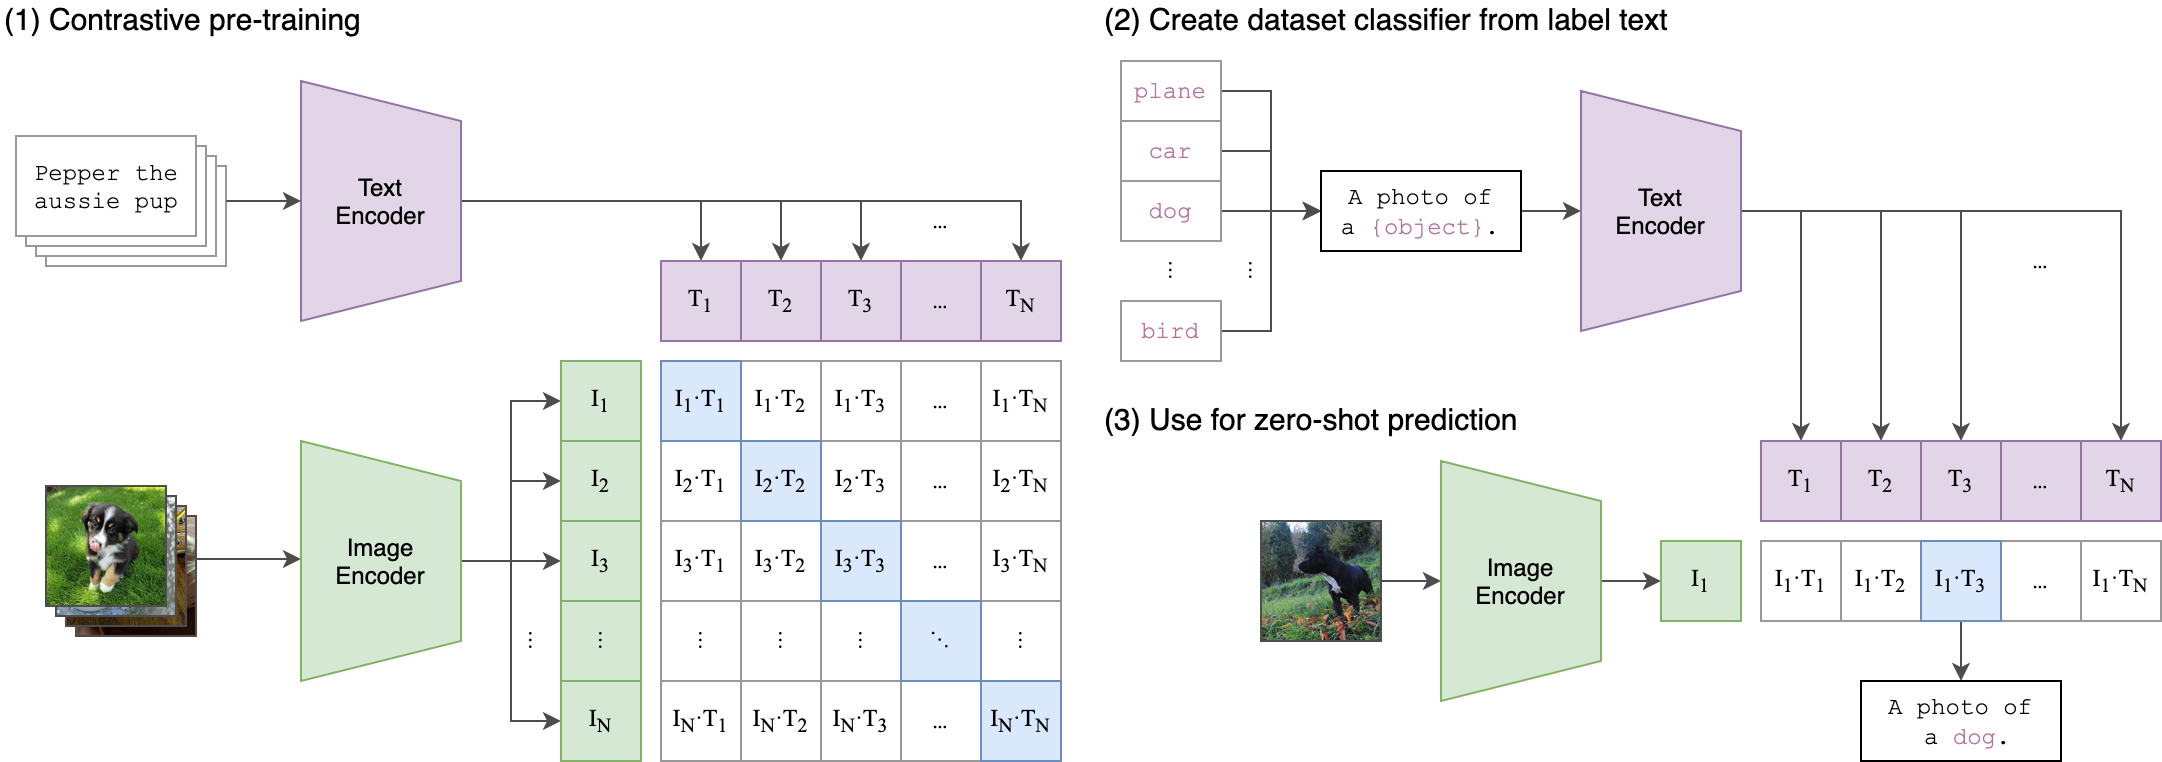

In [42]:
print("\n we'll see the probabilities according to 3 categories: a diagram, a dog and a cat for this image")

Image.open("CLIP.png")

In [43]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]


Label probs: [[0.9927937  0.0042107  0.00299572]]


In [33]:
clip.available_models()

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32', 'ViT-B/16']

In [63]:
#let's try another model with my Linkedin profile picture! 

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("RN50x16", device=device)

image = preprocess(Image.open("yo 4.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["preffesional", "unprofessional", "super professional"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  


100%|███████████████████████████████████████| 630M/630M [01:59<00:00, 5.51MiB/s]


Label probs: [[0.00197463 0.08398551 0.91403985]]
